## **Exploratory Data Analisys (EDA)**

En este notebook nos enfoncaremos en hacer un analisis exploratorio de los datos ya trabajados en el notebook ETL.
Nuestro objetivo principal es aplicar metodos matematicos y el uso de graficos con el fin de encontrar informacion util como:

* Outliers
* Quartiles
* Metodos estadisticos (Moda, Media, Mediana, Varianza, Desviacion Estandar)
* Etc

Tambien haremos uso similar del patron MVC para crear nuestro codigo

## 1. Librerias

    Esta celda nos ayudara a cargar las librerias necesarias y extraer los Datasets necesarios.

In [1]:
#Carga de librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() #Estandarizamos los disenios de nuestras graficas

#Carga de Datasets

steam_games_data = pd.read_parquet("data\\steam_game_data")
user_items_data = pd.read_parquet("data\\user_items_data")
user_reviews_data = pd.read_parquet("data\\user_reviews_data")

#Para realizas el analisis de sentimientos debemos usar las siguientes librerias y modulos

import nltk
from textblob import TextBlob
nltk.download('punkt')

#Para realizar el worcloud debemos usar las siguientes librerias:
from wordcloud import WordCloud


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## 2. Acciones

    Esta celda nos ayudara a crear todas las funciones que se vayan requiriendo durante el ejercicio.

In [2]:
#Funcion que nos permite crear un dataframe con dos columnas para un formato booleano

def df_bool(dataframe_file, col, year, bool):

    data_aux = dataframe_file[dataframe_file[col] == bool]
    data_aux = data_aux[year].value_counts().reset_index()
    data_aux.columns = ["year", "count"]

    return data_aux


#Funcion que nos permite realizar un analisis de sentimientos

def analisis_sentimiento(data):

    analisis = TextBlob(data) #instanciamos el objeto Textblobl()
    
    #Basicamente este metodo nos permite observar en que punto se encuentra el parrafo a analizar.
    #Depende de nuestro criterio si la review es positiva o negativa. Pero, usualmente esta polaridad
    #suele ser compatible con los valores de la recta real.
    
    polaridad = analisis.sentiment.polarity 

    if polaridad > 0.1:
        return 2 #bueno
    
    elif polaridad < -0.1:
        return 0 #malo
    
    else:
        return 1 #neutral



## 3. Vistas
    
    Las siguientes celdas se enfocaran en las vistas de los distintos Datasets

## 3.1 Steam Games EDA

Las columnas encontradas en este Dataset, que tomaremos en cuenta, son:

* **genres**: Genero del juego
* **title**: Titulo del juego
* **price**: Precio del juego
* **id**: Id del juego
* **release_year**: Anio de lanzamiento
* **developer**: Desarrolladores

## 3.1.1 Cantidad de outliers y Juegos Free To Play
    Calculemos la cantidad de Outliers que se presentando dentro de la informacion. A esto, adicionemos la participacion porcentual de cada concepto.

In [3]:
#Calculemos los outliers
iqr = steam_games_data["price"].quantile(0.75) - steam_games_data["price"].quantile(0.25) #rango intercuartil
umbral_sup = steam_games_data["price"].quantile(0.75) + 1.5 * iqr
umbral_inf = steam_games_data["price"].quantile(0.25) -1.5 * iqr

cantidad_juegos = len(steam_games_data["title"].unique())
outliers_sup = steam_games_data["title"][steam_games_data["price"] > umbral_sup]
outliers_inf = steam_games_data["title"][steam_games_data["price"] < umbral_inf]
juegos_gratis = steam_games_data["title"][steam_games_data["price"] == 0]

parti_sup = (len(outliers_sup.unique())/ cantidad_juegos)*100
parti_inf = (len(outliers_inf.unique())/ cantidad_juegos)*100
parti_gratis = (len(juegos_gratis.unique())/ cantidad_juegos)*100

print(f"Cantidad de juegos total: {cantidad_juegos}") 
print(f"Cantidad juegos que superan los ${round(umbral_sup,2)}: {len(outliers_sup.unique())}, participacion: {round(parti_sup,2)}%")
print(f"Cantidad juegos que inferiores los ${round(umbral_inf,2)}: {len(outliers_inf.unique())}, participacion: {round(parti_inf,2)}%")
print(f"Cantidad de juegos Free To Play: {len(juegos_gratis.unique())}, participacion: {round(parti_gratis,2)}%") 

Cantidad de juegos total: 28828
Cantidad juegos que superan los $21.99: 1746, participacion: 6.06%
Cantidad juegos que inferiores los $-10.01: 0, participacion: 0.0%
Cantidad de juegos Free To Play: 2771, participacion: 9.61%


## 3.1.2 Cantidad de juegos por anio
    Calculemos, en una lista, la cantidad de juegos por anio y como se ven representandos graficamente

In [4]:
data_sin_duplicados = steam_games_data[["title","release_year"]].drop_duplicates()
data_year = data_sin_duplicados.dropna(subset=["release_year"])["release_year"].astype(int)
lista_data = data_year.value_counts()
print(lista_data[:15])

release_year
2017    9248
2016    6698
2015    4799
2014    2740
2013    1476
2012    1138
2011     542
2010     399
2009     320
2008     194
2007     149
2006     142
2018     119
2005      92
2003      74
Name: count, dtype: int64


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\andre\AppData\Local\Temp\ipykernel_3304\2768027841.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(lista_data, palette="pastel")


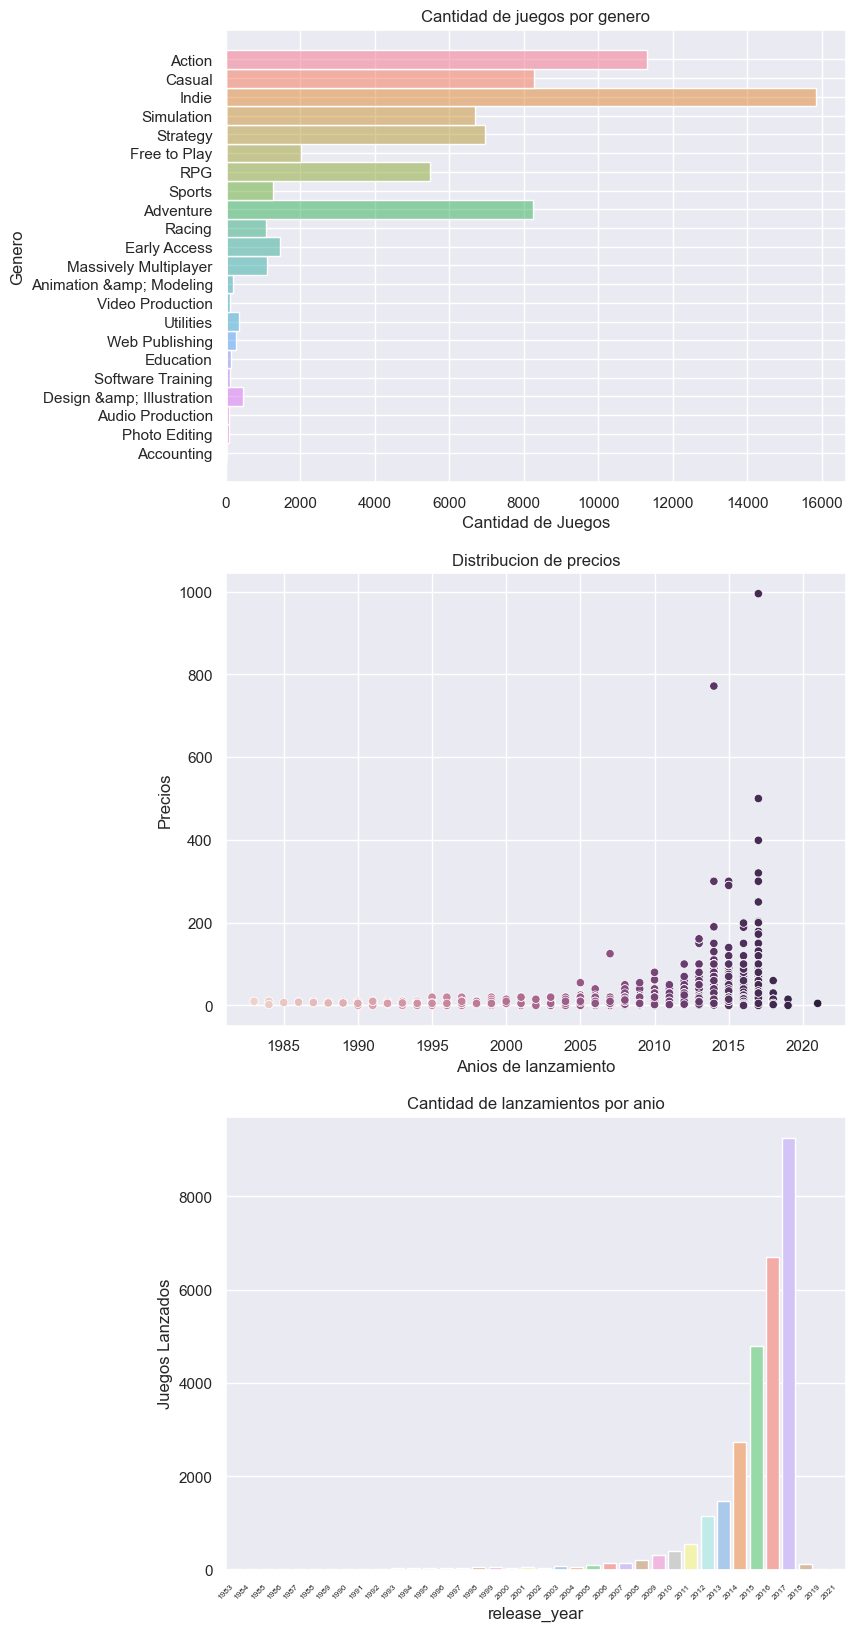

In [5]:
#Vamos a hacer algunos plots
plt.figure(figsize=(8,20))

plt.subplot(3,1,1)
sns.histplot(steam_games_data, y = "genres", hue="genres")
plt.xlabel("Cantidad de Juegos")
plt.ylabel("Genero")
plt.title("Cantidad de juegos por genero")
ax = plt.gca()
ax.legend().set_visible(False)

plt.subplot(3,1,2)
sns.scatterplot(steam_games_data, x= "release_year", y= "price", hue="release_year")
plt.xlabel("Anios de lanzamiento")
plt.ylabel("Precios")
plt.title("Distribucion de precios")
ax = plt.gca()
ax.legend().set_visible(False)

plt.subplot(3,1,3)
data_sin_duplicados = steam_games_data[["title","release_year"]].drop_duplicates()
data_year = data_sin_duplicados.dropna(subset=["release_year"])["release_year"].astype(int)
lista_data = data_year.value_counts()
sns.barplot(lista_data, palette="pastel")
plt.xticks(rotation=45, ha='right',fontsize = 6)
plt.ylabel("Juegos Lanzados")
plt.title("Cantidad de lanzamientos por anio")

plt.show()


Observaciones: 
* Los juegos Indies y Action son quienes predominan en el mercado ocupando el primer y segundo puesto respecticamente.
* La densidad poblacional referente a los precios se encuentra entre los $0 - $100. Y entre el 2010 - 2017 tuvo un aumento significativo.
* El anio en que mas se lanzaron juegos fue el 2017.

## 3.1.3 TOP 10 & Early Acces
    Calculemos nuestro top 10 en relacion a los desarrolladores y la cantidad de juegos que tuvieron **Early Access**

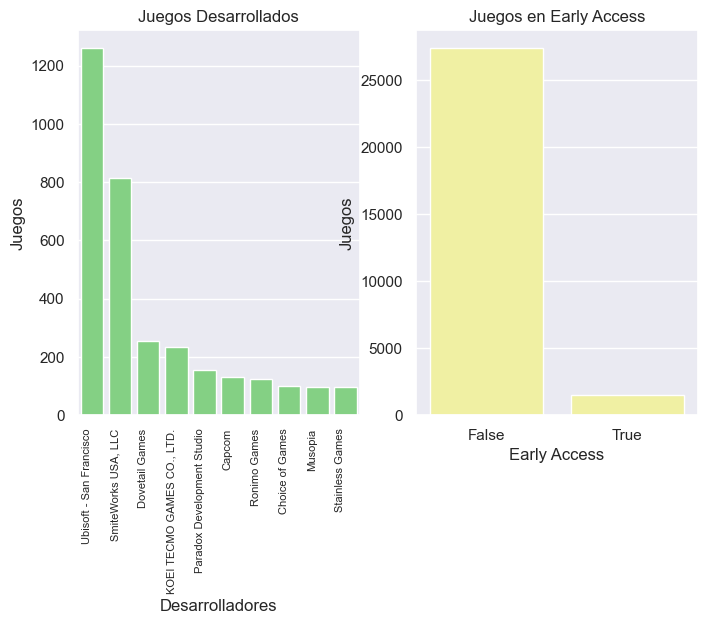

In [6]:
#Separamos la data "developer"
data_dev = steam_games_data[["title","developer"]].drop_duplicates()
dev_count = data_dev["developer"].value_counts()

#Separamos la data "early_access"
data_early = steam_games_data[["title","early_access"]].drop_duplicates()
early_count = data_early["early_access"].value_counts()

#Graficamos
plt.figure(figsize=(8,5))

plt.subplot(1,2,1)
sns.barplot(dev_count[:10],color="#77dd77")
plt.xticks(rotation = 90, ha = 'right' , fontsize = 8)
plt.xlabel("Desarrolladores")
plt.ylabel("Juegos")
plt.title("Juegos Desarrollados")

plt.subplot(1,2,2)
sns.barplot(early_count, color="#fdfd96")
plt.xlabel("Early Access")
plt.ylabel("Juegos")
plt.title("Juegos en Early Access")

plt.show()


Observaciones:
* El desarrollador que lidero el mercado fue **Ubisoft* - San Francisco*
* La gran mayoria de juegos lanzados no tuvieron Early Access

## 3.2 User Items EDA

Las columnas encontradas en este Dataset, que tomaremos en cuenta, son:

* **user_id**: ID de usuario
* **items_count**: Titulo del juego
* **item_name**: Precio del juego

## 3.2.1 Top 5

    Calculemos nuestro top 5 en relacion a los juegos y usuarios

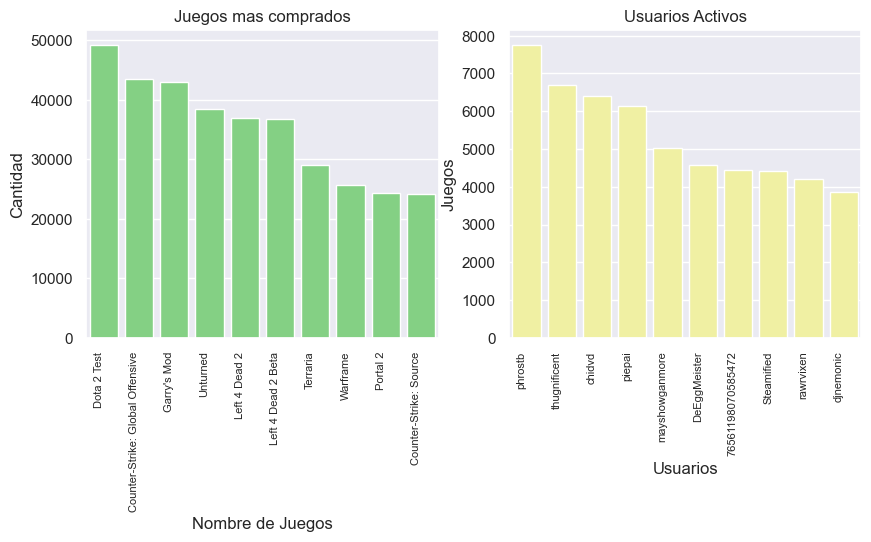

In [7]:

#Graficamos
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.barplot(user_items_data["item_name"].value_counts()[:10],color="#77dd77")
plt.xticks(rotation = 90, ha = 'right' , fontsize = 8)
plt.xlabel("Nombre de Juegos")
plt.ylabel("Cantidad")
plt.title("Juegos mas comprados")

plt.subplot(1,2,2)
sns.barplot(user_items_data["user_id"].value_counts()[:10], color="#fdfd96")
plt.xticks(rotation = 90, ha = 'right' , fontsize = 8)
plt.xlabel("Usuarios")
plt.ylabel("Juegos")
plt.title("Usuarios Activos")

plt.show()


Observaciones:
* Juego mas comprado: Dota 2 Test
* Usuario mas activo: Phrostb

## 3.3 User Reviews EDA

Las columnas encontradas en este Dataset, que tomaremos en cuenta, son:

* **user_id**: ID de usuario
* **items_count**: Titulo del juego
* **item_name**: Precio del juego
* **recommend**: Recomendaciones
* **posted_year**: Anio del post

## 3.3.1 Usuarios, Reviews y Recomendaciones
    De las columnas mencionadas en el titulo, calculemos:
* Cantidad por cada uno de ellos
* Cantidad de recomendaciones
* Percepcion porcentual de los juegos lanzados 

C:\Users\andre\AppData\Local\Temp\ipykernel_3304\2335491129.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dicc_recomendaciones["Lo Recomiendan"] = cantidad_recomendaciones[0]
C:\Users\andre\AppData\Local\Temp\ipykernel_3304\2335491129.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dicc_recomendaciones["No lo Recomiendan"] = cantidad_recomendaciones[1]
C:\Users\andre\AppData\Local\Temp\ipykernel_3304\2335491129.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access

Cantidad de usuarios registrados 2010 - 2015: 25440
Cantidad de reviews registrados 2010 - 2015: 55285
Cantidad de recomendaciones positivas y negativas durante 2010 - 2015 = {'Lo Recomiendan': 52447, 'No lo Recomiendan': 6829}
Percepcion porcentual de los juegos lanzados durante 2010 - 2015 = {'Percepcion Positiva': 88.0, 'Percepcion Negativa': 12.0}


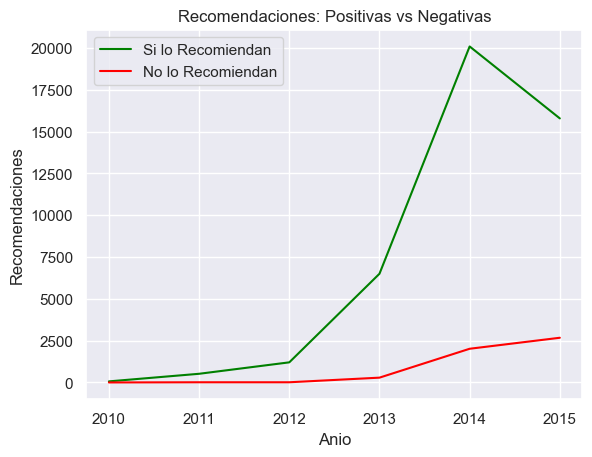

In [8]:
# Cantidad de usuarios

cantidad_usuarios = len(user_reviews_data["user_id"].unique())
cantidad_reviews = len(user_reviews_data["review"].unique())
cantidad_recomendaciones = user_reviews_data["recommend"].value_counts()

#Diccionario de recomendaciones

dicc_recomendaciones = {}
dicc_recomendaciones["Lo Recomiendan"] = cantidad_recomendaciones[0]
dicc_recomendaciones["No lo Recomiendan"] = cantidad_recomendaciones[1]

#Diccionario de Percepcion

dicc_percepcion = {}
dicc_percepcion["Percepcion Positiva"] = round(cantidad_recomendaciones[0]/(cantidad_recomendaciones[0] + cantidad_recomendaciones[1]),2)*100
dicc_percepcion["Percepcion Negativa"] = round(cantidad_recomendaciones[1]/(cantidad_recomendaciones[0] + cantidad_recomendaciones[1]),2)*100


min_year = int(user_reviews_data["posted_year"].min())
max_year = int(user_reviews_data["posted_year"].max())

print(f'Cantidad de usuarios registrados {min_year} - {max_year}: {cantidad_usuarios}')
print(f'Cantidad de reviews registrados {min_year} - {max_year}: {cantidad_reviews}')

print(f'Cantidad de recomendaciones positivas y negativas durante {min_year} - {max_year} = {dicc_recomendaciones}')
print(f'Percepcion porcentual de los juegos lanzados durante {min_year} - {max_year} = {dicc_percepcion}')

#Grafiquemos las recomendaciones

data_usuarios = user_reviews_data[["recommend","posted_year"]]
data_usuarios.dropna(inplace=True)

data_true = df_bool(user_reviews_data,"recommend","posted_year",True)
data_false = df_bool(user_reviews_data,"recommend","posted_year",False)

sns.lineplot(data_true,x ="year",y="count",  label = "Si lo Recomiendan", markers= True, dashes=False, color= "green")
sns.lineplot(data_false,x ="year",y="count",  label = "No lo Recomiendan", markers= True, dashes=False, color= 'red')

plt.xlabel("Anio")
plt.ylabel("Recomendaciones")
plt.title("Recomendaciones: Positivas vs Negativas")
plt.show()

## 3.3.2 Wordcloud & Analisis de sentimientos

Media: 1.31
Mediana: 1.0
Moda : 2
Desviacion Estandar: 0.7
Porcentaje de Dispersion: 53.31



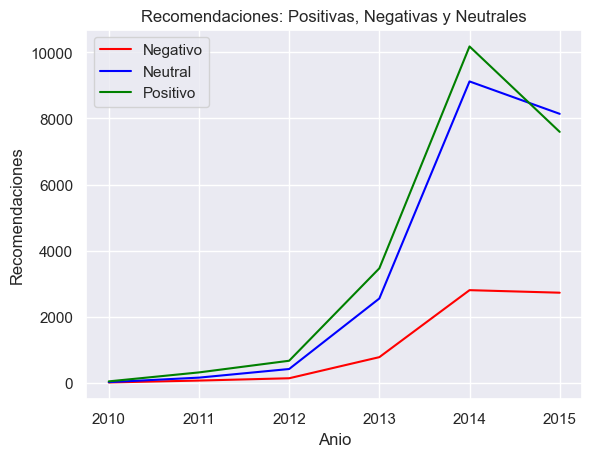

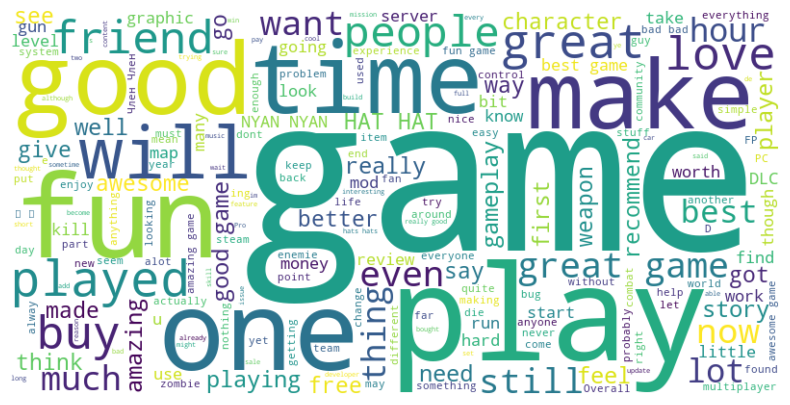

In [9]:

# Creamos una columna adicional: sentiment

user_reviews_data["sentiment"] = user_reviews_data["review"].apply(analisis_sentimiento)

#Un poco de estadistica basica

print(f"""Media: {round(user_reviews_data["sentiment"].mean(),2)}
Mediana: {user_reviews_data["sentiment"].median()}
Moda : {user_reviews_data["sentiment"].mode().values[0]}
Desviacion Estandar: {round(user_reviews_data["sentiment"].std(),2)}
Porcentaje de Dispersion: {round((user_reviews_data["sentiment"].std() / user_reviews_data["sentiment"].mean())*100,2)}
""")

#Creamos los df para graficar el analisis de sentimiento

colors = ["red", "blue", "green"]
labels = ["Negativo","Neutral","Positivo"]

for i in range(3):
    data_aux = df_bool(user_reviews_data,"sentiment","posted_year",i)
    sns.lineplot(data_aux,x ="year",y="count",  label = labels[i], markers= True, dashes=False, color= colors[i])

plt.xlabel("Anio")
plt.ylabel("Recomendaciones")
plt.title("Recomendaciones: Positivas, Negativas y Neutrales")
plt.show()

#Para el Wordcloud vamos a concatenar todas las palabras dentro de la columna "reviews"

frases_concat = " ".join(review for review in user_reviews_data["review"])

#Instanciamos Objeto WordCloud y generamos la lista que cuenta las palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(frases_concat)

#Mostramos la nube de palabras

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()




## Adicional
    Usamos esta celda para actualizar nuestro Dataset "user_reviews_data" al incluir la nueva columna de "sentiment"

In [10]:
user_reviews_data.to_parquet("data\\user_reviews_data",index=False)
print(f"Dataset Actualizado: user_reviews_data.parquet")

Dataset Actualizado: user_reviews_data.parquet
